In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [37]:
# read the csv path. you might need to change this path
pathName = r"C:\MyFiles\Dropbox\Teaching\Urban_Data_Analsysis\Spring 2021\Data\NYC_Census_Tracts.csv"

In [38]:
# read the csv file as a dataframe
df = pd.read_csv(pathName)

In [39]:
# get a list of columns
df.columns

Index(['GISJOIN', 'Population_2000', 'NH_White_2000', 'NH_Black_2000',
       'Asian_2000', 'HispanicLatino_2000', 'Other_2000', 'HousingUnits_2000',
       'MedHHIncome_2000', 'Age_25_Up_2000', 'Age_25_Up_College_2000',
       'MedianRent_2000', 'MedianHousingValue_2000', 'AreaAcre',
       'Population_610', 'NH_White_610', 'NH_Black_610', 'Asian_610',
       'HispanicLatino_610', 'Age_25_Up_610', 'MedHHIncome_610',
       'HousingUnits_610', 'MedianRent_610', 'MedianHousingValue_610',
       'Age_25_Up_College_610', 'Population_1216', 'NH_White_1216',
       'NH_Black_1216', 'Asian_1216', 'HispanicLatino_1216', 'Age_25_Up_1216',
       'MedHHIncome_1216', 'HousingUnits_1216', 'MedianRent_1216',
       'MedianHousingValue_1216', 'Age_25_Up_College_1216', 'Borough_Name',
       'HeatVulIndex'],
      dtype='object')

In [40]:
# get a sample of rows
df.sample(3)

,GISJOIN,Population_2000,NH_White_2000,NH_Black_2000,Asian_2000,HispanicLatino_2000,Other_2000,HousingUnits_2000,MedHHIncome_2000,Age_25_Up_2000,...,Asian_1216,HispanicLatino_1216,Age_25_Up_1216,MedHHIncome_1216,HousingUnits_1216,MedianRent_1216,MedianHousingValue_1216,Age_25_Up_College_1216,Borough_Name,HeatVulIndex
2054,G3600050026601,3003,2187,57,102,614,43,1451,31480,2156,...,89,1714,2334,58125,1429,1311,415400,450,Bronx,1
787,G3600470113200,1387,3,1047,2,325,10,531,20288,859,...,19,280,1228,50952,735,1341,353000,221,Brooklyn,5
47,G3600850027704,3939,3030,56,520,261,72,1363,58804,2556,...,793,216,3091,98722,1531,1444,467200,934,Staten Island,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   GISJOIN                  2147 non-null   object
 1   Population_2000          2147 non-null   int64 
 2   NH_White_2000            2147 non-null   int64 
 3   NH_Black_2000            2147 non-null   int64 
 4   Asian_2000               2147 non-null   int64 
 5   HispanicLatino_2000      2147 non-null   int64 
 6   Other_2000               2147 non-null   int64 
 7   HousingUnits_2000        2147 non-null   int64 
 8   MedHHIncome_2000         2147 non-null   int64 
 9   Age_25_Up_2000           2147 non-null   int64 
 10  Age_25_Up_College_2000   2147 non-null   int64 
 11  MedianRent_2000          2147 non-null   int64 
 12  MedianHousingValue_2000  2147 non-null   int64 
 13  AreaAcre                 2147 non-null   int64 
 14  Population_610           2147 non-null  

In [42]:
# get the unique values of a categorical variable
df['HeatVulIndex'].unique()

array([ 2,  3,  1, -1,  4,  5], dtype=int64)

In [68]:
# calculate a new column using other columns
df['pop_density_2000'] = df['Population_2000']/df['AreaAcre']
df['pop_density_0610'] = df['Population_610']/df['AreaAcre']
df['pop_density_1216'] = df['Population_1216']/df['AreaAcre']

df['Pct_NH_White_2000'] = df['NH_White_2000'] * 100 / df['Population_2000']
df['Pct_NH_White_0610'] = df['NH_White_610'] * 100 / df['Population_610']
df['Pct_NH_White_1216'] = df['NH_White_1216'] * 100 / df['Population_1216']

df['Housing_Density_2000'] = df['HousingUnits_2000'] / df['AreaAcre']
df['Housing_Density_0610'] = df['HousingUnits_610'] / df['AreaAcre']
df['Housing_Density_1216'] = df['HousingUnits_1216'] / df['AreaAcre']

df['pct_black2000']=df['NH_Black_2000']/df['Population_2000']
df['pct_black0610']=df['NH_Black_610']/df['Population_610']
df['pct_black1216']=df['NH_Black_1216']/df['Population_1216']

df['rentBurden_2000'] = (df['MedianRent_2000']*12)/df['MedHHIncome_2000']
df['rentBurden_0610'] = (df['MedianRent_610']*12)/df['MedHHIncome_610']
# df['rentBurden_1216'] = (df['MedianRent_1216']*12)/df['MedHHIncome_1216'] # this code does not work because there are some income values as 0 and any number / 0 is inf.
# we can use this code instead
# 'col_to_write' can be a new column or an existing one that you want to rewrite
# Condition limits the rows that need to be written. for example: df['a_col'] > number
# value can be a number or a fromula that uses the columns of the df
# syntax: df.loc[(condition),'col_to_write'] = value
df.loc[(df['MedHHIncome_1216']>0),'rentBurden_1216'] = (df['MedianRent_1216']*12)/df['MedHHIncome_1216']

In [47]:
# another example for running a formula on a subset
df.loc[(df['Population_1216']>0),'pct_black_1216'] = (df['NH_Black_1216']*100)/df['Population_1216']

In [48]:
# df.drop('rentBurden_1216',axis=1,inplace=True)

In [69]:
df['rentBurden_2000'].std()

0.0632431618675047

In [70]:
df['rentBurden_2000'].quantile(0.75)

0.2558731955844891

In [71]:
df['rentBurden_2000'].quantile(0.25)

0.18305299458089944

In [72]:
df.sample(5)

,GISJOIN,Population_2000,NH_White_2000,NH_Black_2000,Asian_2000,HispanicLatino_2000,Other_2000,HousingUnits_2000,MedHHIncome_2000,Age_25_Up_2000,...,pct_black0610,pct_black1216,rentBurden_2000,rentBurden_0610,rentBurden_1216,pct_black_1216,pop_density_0610,pop_density_1216,Pct_NH_White_0610,Pct_NH_White_1216
2046,G3600050041100,2701,627,362,162,1493,57,1121,35320,1610,...,0.143669,0.222293,0.218800,0.311334,0.397833,22.229259,84.965517,108.896552,19.074675,9.658011
1889,G3600050008300,6204,61,1086,25,5019,13,2144,25886,3389,...,0.194350,0.137215,0.207216,0.383283,0.469873,13.721504,118.442308,132.442308,1.461276,0.333963
294,G3600610009500,2694,1933,165,345,214,37,904,60993,1336,...,0.007297,0.033013,0.195957,0.193300,0.170155,3.301321,81.571429,79.333333,74.576766,67.917167
1780,G3600810064500,1883,1205,36,357,272,12,780,47763,1394,...,0.008542,0.023112,0.219333,0.215921,0.241221,2.311248,24.644737,25.618421,40.950347,53.004622
736,G3600470006200,3062,2042,16,429,372,203,1314,34576,2200,...,0.020543,0.085048,0.240167,0.259997,0.304479,8.504801,71.800000,72.900000,64.972145,59.807956


<AxesSubplot:xlabel='Housing_Density_2000', ylabel='Count'>

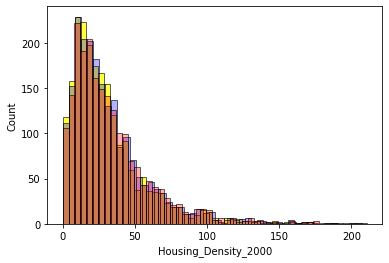

In [18]:
sns.histplot(data=df,x='Housing_Density_2000',bins=50,color='Yellow')
sns.histplot(data=df,x='Housing_Density_0610',bins=50,color='Blue',alpha=0.3)
sns.histplot(data=df,x='Housing_Density_1216',bins=50,color='Red',alpha=0.3)


<AxesSubplot:xlabel='rentBurden_1216', ylabel='Count'>

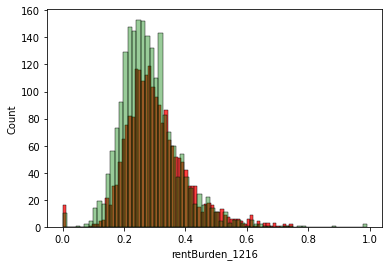

In [19]:
sns.histplot(data=df,x='rentBurden_1216',bins=70,color='Red')
sns.histplot(data=df,x='rentBurden_0610',bins=70,color='Green',alpha= 0.4)

<AxesSubplot:xlabel='rentBurden_1216', ylabel='pct_black_1216'>

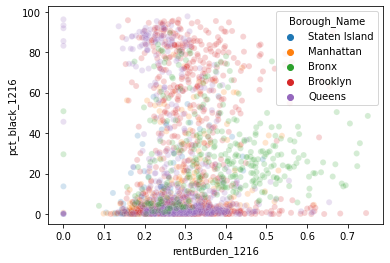

In [73]:
# simple scatter plot
sns.scatterplot(data=df, x ='rentBurden_1216',y ='pct_black_1216',alpha=0.2, hue='Borough_Name')

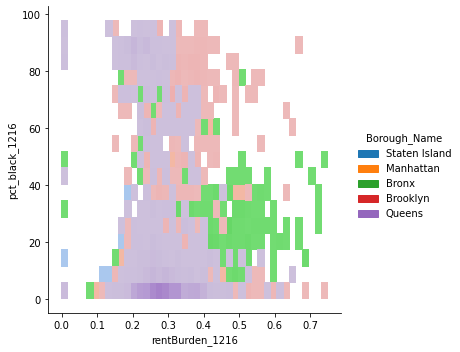

In [74]:
sns.displot(df, x ='rentBurden_1216',y ='pct_black_1216',hue='Borough_Name')

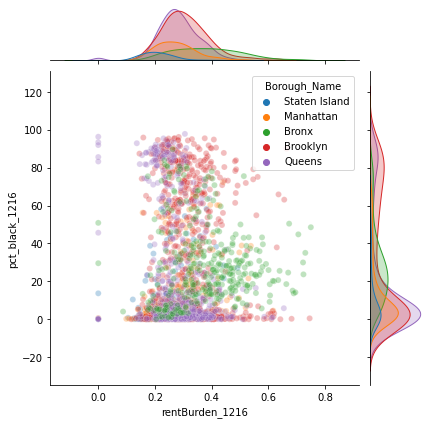

In [75]:
sns.jointplot(data=df,  x ='rentBurden_1216',y ='pct_black_1216',alpha=0.3,hue = 'Borough_Name')

<AxesSubplot:xlabel='HeatVulIndex', ylabel='rentBurden_1216'>

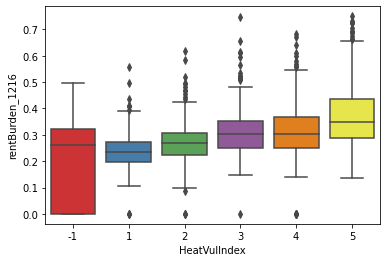

In [24]:
sns.boxplot(x="HeatVulIndex", y="rentBurden_1216", data=df , palette="Set1")

<AxesSubplot:xlabel='Borough_Name', ylabel='rentBurden_1216'>

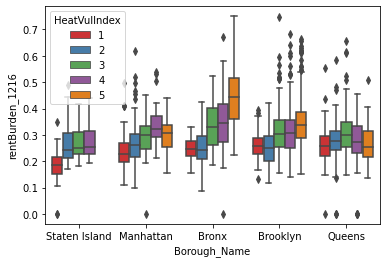

In [25]:
newDf=df[df['HeatVulIndex']>=0]
sns.boxplot(x="Borough_Name", y="rentBurden_1216", data=newDf , palette="Set1",hue='HeatVulIndex')

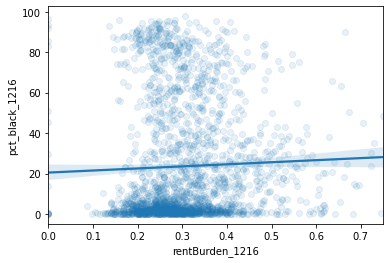

In [85]:
sns.regplot(x="rentBurden_1216", y="pct_black_1216", data=df,scatter_kws={'alpha':0.1});

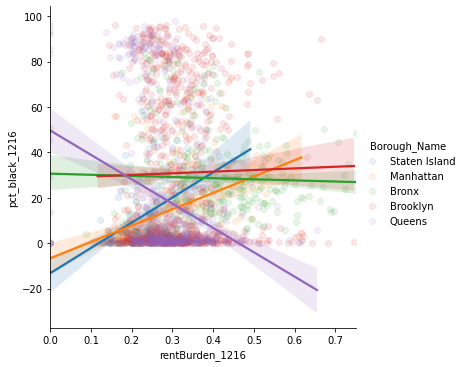

In [86]:
sns.lmplot(x="rentBurden_1216", y="pct_black_1216",  hue = 'Borough_Name', data=df,scatter_kws={'alpha':0.1});

In [28]:
stats.pearsonr?

Signature: stats.pearsonr(x, y)
Docstring:
Pearson correlation coefficient and p-value for testing non-correlation.

The Pearson correlation coefficient [1]_ measures the linear relationship
between two datasets.  The calculation of the p-value relies on the
assumption that each dataset is normally distributed.  (See Kowalski [3]_
for a discussion of the effects of non-normality of the input on the
distribution of the correlation coefficient.)  Like other correlation
coefficients, this one varies between -1 and +1 with 0 implying no
correlation. Correlations of -1 or +1 imply an exact linear relationship.
Positive correlations imply that as x increases, so does y. Negative
correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system
producing datasets that have a Pearson correlation at least as extreme
as the one computed from these datasets.

Parameters
----------
x : (N,) array_like
    Input array.
y : (N,) array_like


## Correlation

In [ ]:
stats.pearsonr(df['pct_black2000'],df['rentBurden_2000'])

In [61]:
# get a subset of columns
dfRun = df[['pct_black2000','rentBurden_2000']]
# replace inf and -inf with nan
dfRun.replace([np.inf, -np.inf], np.nan)
# drop nan values
dfRun.dropna(inplace=True)

# stats.pearsonr(x, y)
stats.pearsonr(dfRun['pct_black2000'],dfRun['rentBurden_2000'])
# the first output is the correlation value and the second outcome is the p-value

C:\Users\Mehdi\.conda\envs\UrbanDataAnalysis\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(0.07058283642657351, 0.0011427980029361147)

### Get a subset of a df

In [87]:
# Condition limits the rows that need to be written. for example: df['a_col'] > number
# syntax: df.loc[(condition)] 
dfSub = df.loc[df['Borough_Name']=='Bronx']